<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

## <center> Assignment 4 (demo)
### <center>  Sarcasm detection with logistic regression
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) + [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).**


We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [1]:
#!ls ../input/sarcasm/

In [2]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline,make_pipeline,FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
train_df = pd.read_csv('../../data/train-balanced-sarcasm.csv')

In [4]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [6]:
train_df.dropna(subset=['comment'], inplace=True)

We notice that the dataset is indeed balanced

In [7]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [8]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17)

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

In [9]:
#If we are using bag of words strategy, it might be worth to remove all the stopwords from the dataset.
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stopwords
#

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
import re
#Defining a special function(shamelessly copied from one of my Machine Learning Labs)
def reply_to_words( review_text ):
    # 2. Делаем все буквы строчными и создаем массив слов
    words = review_text.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stopwords]
    # 4. Формируем текст, объединяя слова через пробел
    return( " ".join( meaningful_words ))

In [11]:
train_df['comment'] = train_df['comment'].apply(reply_to_words)


In [12]:
train_df['comment'][0]

'nc nh.'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [14]:
c_vector = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
bag_of_words = c_vector.fit_transform(train_df['comment'])
bag_of_words

<1010773x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 6502766 stored elements in Compressed Sparse Row format>

In [15]:
vocabulary = c_vector.get_feature_names()
vocabulary

['00',
 '000',
 '000 000',
 '000 miles',
 '000 people',
 '000 times',
 '000 year',
 '000 years',
 '00001001',
 '001',
 '00100000',
 '00110001',
 '01',
 '01011001',
 '01100001',
 '01100101',
 '01101001',
 '01101110',
 '01110100',
 '01111001',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '10 000',
 '10 10',
 '10 11',
 '10 12',
 '10 15',
 '10 20',
 '10 22',
 '10 30',
 '10 best',
 '10 bucks',
 '10 days',
 '10 dollars',
 '10 enough',
 '10 feet',
 '10 fps',
 '10 game',
 '10 games',
 '10 hours',
 '10 million',
 '10 min',
 '10 mins',
 '10 minute',
 '10 minutes',
 '10 months',
 '10 needs',
 '10 people',
 '10 per',
 '10 points',
 '10 rice',
 '10 second',
 '10 seconds',
 '10 team',
 '10 times',
 '10 would',
 '10 year',
 '10 years',
 '100',
 '100 000',
 '100 accurate',
 '100 agree',
 '100 bucks',
 '100 certain',
 '100 chance',
 '100 correct',
 '100 dollars',
 '100 effective',
 '100 games',
 '100 hours',
 '100 legit',
 '100 million',
 '100 people',
 '100 percent',
 '100 pure',
 '

In [16]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17,shuffle=True)

In [17]:
X_train = c_vector.fit_transform(train_texts)

In [18]:
X_test = c_vector.transform(valid_texts)

In [19]:
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)


LogisticRegression(n_jobs=-1, random_state=17)

In [20]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_valid), 3),

(0.727, 0.694)

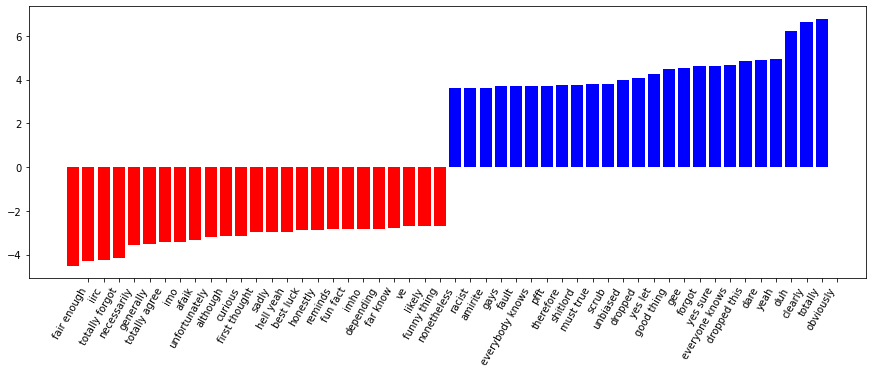

In [21]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    plt.legend();
    
visualize_coefficients(logit, c_vector.get_feature_names())

In [22]:
#Let's go for pipeline and CV now.
text_pipe_logit = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2),
                                MaxAbsScaler(),
                                # for some reason n_jobs > 1 won't work 
                                # with GridSearchCV's n_jobs > 1
                                LogisticRegression(solver='lbfgs', 
                                                   max_iter=1000,
                                                   #n_jobs=-1,
                                                   random_state=17))


In [23]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17)


In [24]:
text_pipe_logit.fit(train_texts, y_train)
print(text_pipe_logit.score(train_texts, y_train))
print(text_pipe_logit.score(valid_texts, y_valid))

0.730629657331228
0.6929646133267905


In [25]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, 
                          param_grid_logit, 
                          return_train_score=True, 
                          cv=3, n_jobs=-1)

#grid_logit.fit(train_texts, y_train)

Wall time: 1 ms


In [26]:
#grid_logit.best_params_, grid_logit.best_score_

In [27]:
#grid_logit.predict(valid_texts)
#print(grid_logit.score(valid_texts,y_valid))

In [28]:
#If we deciude to add subreddits as a new feature, we would need to label them somehow.
#According to the task, one-hot enconding seems fitting enough. Let's try it.
train_df['subreddit'].unique().shape
#14876 unique values. Won't work. Let's try to also use TF-IDF vectorizer here...



(14876,)

In [29]:
from sklearn.preprocessing import FunctionTransformer
transformer = FeatureUnion([
                ('comment_tfidf', 
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['comment'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=1))])),
                ('subreddit_tfidf', 
                  Pipeline([('extract_field', 
                              FunctionTransformer(lambda x: x['subreddit'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())]))
                            ]) 
pipeline = make_pipeline(transformer,  LogisticRegression(solver='lbfgs', 
                                                   max_iter=1000,
                                                   #n_jobs=-1,
                                                   random_state=17))

In [30]:
train_data, valid_data, y_train, y_valid = \
        train_test_split(train_df[['comment','subreddit']], train_df['label'], random_state=17)

In [31]:
train_data

,comment,subreddit
827869,named samsquanch,electronic_cigarette
800568,knob wants uranus.,AskReddit
506459,dogs gave halfway here.,funny
372707,i'm sure icefrog bad critical self-evaluation,DotA2
548483,thanks contribution discussion.,AskReddit
...,...,...
828759,"skeletons came monkey skeletons, still monkey ...",news
491940,got nerfed pretty heavily right release elderw...,leagueoflegends
297109,wonder worth making f2p pure osrs hunt runite ...,2007scape
589061,"para sa akin, dapat chinese ang ituro sa eleme...",Philippines


In [32]:
train_data.shape
transformer.fit(train_data,y_train)
res = transformer.transform(train_data)

In [33]:
pipeline.fit(train_data,y_train)
print(pipeline.score(train_data, y_train))
print(pipeline.score(valid_data, y_valid))

0.7370379604236498
0.7007131154677199


In [34]:
#Now That is more like it! At least 70%, and not even a CV inbound!

params = {'lr__C': np.logspace(-5, 0, 6), 'lr__penalty':['l2', 'elasticnet']}

pipeline = Pipeline(steps = [('tranformer', transformer), ('lr', LogisticRegression(solver='lbfgs', 
                                                   max_iter=10000,
                                                   #n_jobs=-1,
                                                   random_state=17))])

pipeline_logit = GridSearchCV(pipeline, 
                          params, 
                          return_train_score=True, 
                          cv=3, n_jobs=-1)

In [35]:
pipeline_logit.fit(train_data,y_train)
pipeline_logit.best_params_, pipeline_logit.best_score_


d:\vision systems\internship\mlcourse.ai\venv\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.61502693        nan 0.61202592        nan 0.61711906        nan
 0.65675345        nan 0.68887939        nan 0.69662529        nan]
  category=UserWarning
d:\vision systems\internship\mlcourse.ai\venv\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the train scores are non-finite: [0.61693504        nan 0.61358513        nan 0.6188016         nan
 0.66209854        nan 0.70719608        nan 0.74391257        nan]
  category=UserWarning


({'lr__C': 1.0, 'lr__penalty': 'l2'}, 0.6966252857551786)

In [36]:
print(pipeline_logit.score(train_data, y_train))
print(pipeline_logit.score(valid_data, y_valid))

0.7370379604236498
0.7007131154677199


In [37]:
res

<758079x63255 sparse matrix of type '<class 'numpy.float64'>'
	with 5641429 stored elements in Compressed Sparse Row format>

In [39]:
res[1:]

<758078x63255 sparse matrix of type '<class 'numpy.float64'>'
	with 5641427 stored elements in Compressed Sparse Row format>

In [41]:
pd.DataFrame.sparse.from_spmatrix(res).head()

,0,1,2,3,4,5,6,7,8,9,...,63245,63246,63247,63248,63249,63250,63251,63252,63253,63254
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#No concatenation
#Comments transformer
comments = train_data['comment']
tf1 = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=1)
res1 = tf1.fit(comments,y_train)
res1 = tf1.transform(comments)
print(res1.shape)
pd.DataFrame.sparse.from_spmatrix(res1).head()

(758079, 50000)


,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#Subreddits transformer
subreds = train_data['subreddit']
tf2 = TfidfVectorizer()
res2 = tf2.fit(subreds,y_train)
res2 = tf2.transform(subreds)
print(res2.shape)
pd.DataFrame.sparse.from_spmatrix(res2).head()

(758079, 13255)


,0,1,2,3,4,5,6,7,8,9,...,13245,13246,13247,13248,13249,13250,13251,13252,13253,13254
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
a = np.ones((7,3))
b = np.zeros((7,2))
np.concatenate((a,b),axis=1).shape

(7, 5)